In [72]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [74]:
df.shape

(891, 12)

In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


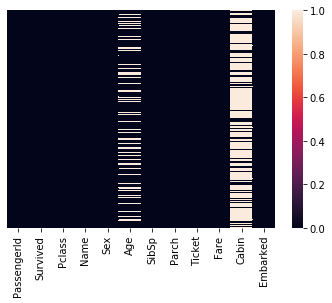

In [77]:
sns.heatmap(df.isnull(),yticklabels=False)

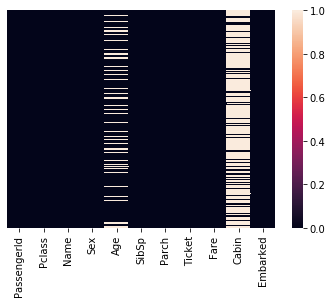

In [78]:
sns.heatmap(df2.isnull(),yticklabels=False)

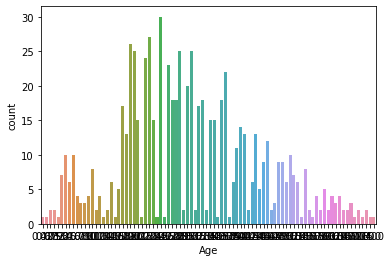

In [79]:
sns.countplot(df['Age'],)

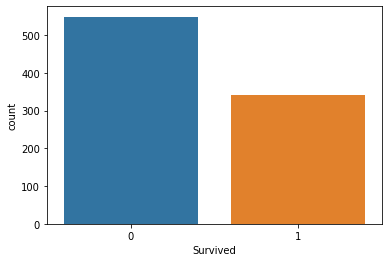

In [80]:
sns.countplot(x='Survived',data=df)

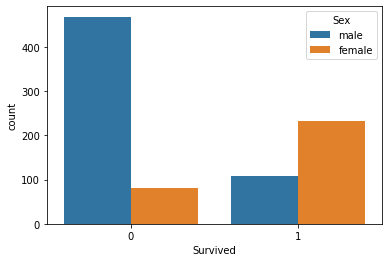

In [81]:
sns.countplot(x='Survived',hue='Sex',data=df)

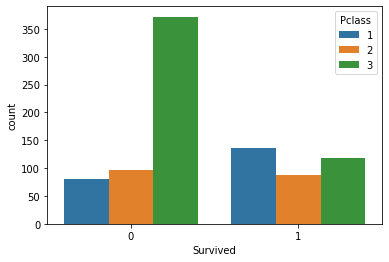

In [82]:
sns.countplot(x='Survived',hue="Pclass",data=df)

In [83]:
df1 = df.loc[(df['Sex']=="male") & (df['Pclass']==3)]

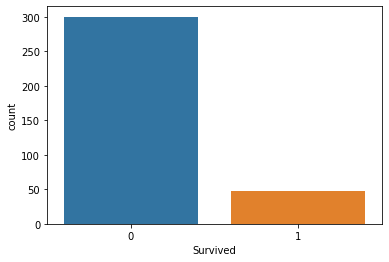

In [84]:
sns.countplot(x='Survived',data = df1)

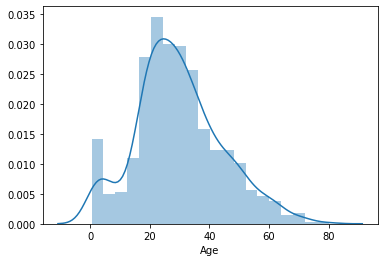

In [85]:
sns.distplot(df['Age'].dropna())

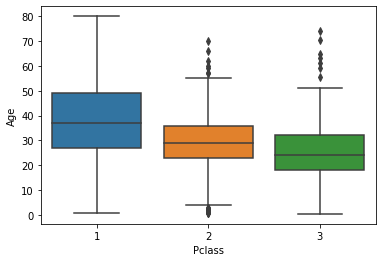

In [86]:
sns.boxplot(x='Pclass',y='Age',data=df)

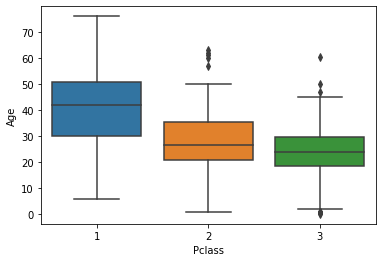

In [87]:
sns.boxplot(x='Pclass',y='Age',data=df2)

In [88]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df2['Title'] = df2.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df['Title'],df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [89]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df2['Title'] = df2['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
df2['Title'] = df2['Title'].replace('Mlle', 'Miss')
df2['Title'] = df2['Title'].replace('Ms', 'Miss')
df2['Title'] = df2['Title'].replace('Mme', 'Mrs')

In [90]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [91]:
df.Title = pd.Categorical(df.Title)
df['Title'] = df.Title.cat.codes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [92]:
df2.Title = pd.Categorical(df2.Title)
df2['Title'] = df2.Title.cat.codes
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


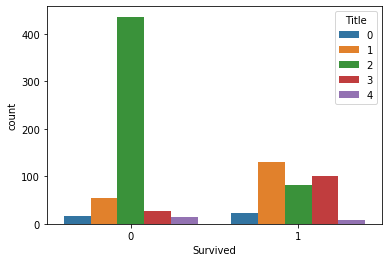

In [93]:
sns.countplot(x='Survived',hue='Title',data=df)

In [94]:
#3rd class age avg
temp = df.query('Pclass==3')
temp = temp['Age'].dropna()
print(np.mean(temp))

temp = df.query('Pclass==2')
temp = temp['Age'].dropna()
print(np.mean(temp))

temp = df.query('Pclass==1')
temp = temp['Age'].dropna()
print(np.mean(temp))

25.14061971830986
29.87763005780347
38.233440860215055


In [95]:
#for test
temp = df2.query('Pclass==3')
temp = temp['Age'].dropna()
print(np.mean(temp))

temp = df2.query('Pclass==2')
temp = temp['Age'].dropna()
print(np.mean(temp))

temp = df2.query('Pclass==1')
temp = temp['Age'].dropna()
print(np.mean(temp))

24.02794520547945
28.7775
40.91836734693877


In [96]:
def give_age(cols):
    age  = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if(pclass==1):
            return 38
        elif(pclass==2):
            return 30
        elif(pclass==3):
            return 25
    else:
        return age

In [97]:
def give_age2(cols):
    age  = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if(pclass==1):
            return 41
        elif(pclass==2):
            return 29
        elif(pclass==3):
            return 24
    else:
        return age

In [98]:
df['Age']  = df[['Age',"Pclass"]].apply(give_age,axis=1)

In [99]:
df2['Age']  = df2[['Age',"Pclass"]].apply(give_age,axis=1)

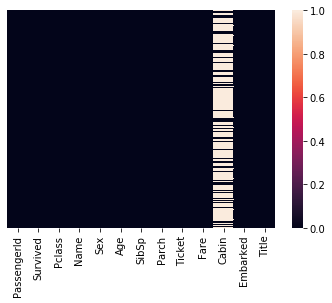

In [100]:
sns.heatmap(df.isnull(),yticklabels=False)

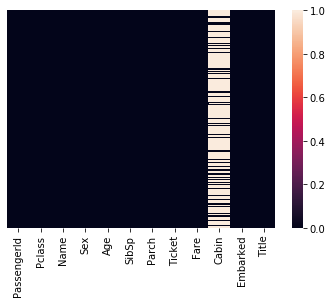

In [101]:
sns.heatmap(df2.isnull(),yticklabels=False)

In [102]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [103]:
df2['Fare'].fillna((df2['Fare'].mean()), inplace=True)

In [104]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

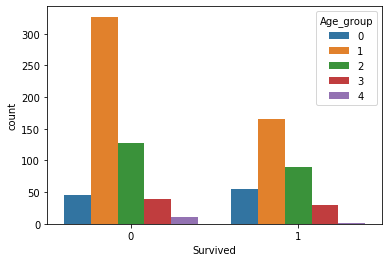

In [105]:
df['Age_group'] = pd.cut(df['Age'],5)
df.Age_group = pd.Categorical(df.Age_group)
df['Age_group'] = df.Age_group.cat.codes
df.head()

df2['Age_group'] = pd.cut(df2['Age'],5)
df2.Age_group = pd.Categorical(df2.Age_group)
df2['Age_group'] = df2.Age_group.cat.codes
df.head()
sns.countplot(x='Survived',hue='Age_group',data=df)

In [106]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,2


,Survived
Family_Size,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


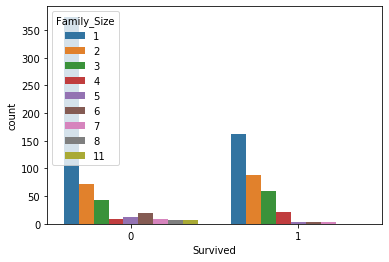

In [107]:
#New Feature FamilySize
df['Family_Size'] = df['SibSp']+df['Parch']+1
sns.countplot(x='Survived',hue='Family_Size',data=df)

df2['Family_Size'] = df2['SibSp']+df2['Parch']+1
#sns.countplot(x='Survived',hue='Family_Size',data=df2)

df[['Survived','Family_Size']].groupby(['Family_Size'],as_index='False').mean().sort_values(by='Survived', ascending=False)

In [108]:
df['alone'] = 0
df.loc[df['Family_Size'] == 1, 'alone'] = 1

df2['alone'] = 0
df2.loc[df2['Family_Size'] == 1, 'alone'] = 1

In [109]:
df[df['Family_Size']>=5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group,Family_Size,alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,5,0
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,2,2,7,0
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,0,0,6,0
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,1,0,5,0
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,3,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S,0,0,6,0
846,847,0,3,"Sage, Mr. Douglas Bullen",male,25.0,8,2,CA. 2343,69.5500,NaN,S,2,1,11,0
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,0,0,7,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,25.0,8,2,CA. 2343,69.5500,NaN,S,1,1,11,0


In [110]:
print(31.2/7)
print(21/5)

4.457142857142857
4.2


In [111]:
# Seems like fare is for whole family , so divide fare with family_size
df['Fare_per_person'] = df['Fare']/df['Family_Size']
df2['Fare_per_person'] = df2['Fare']/df2['Family_Size']

In [112]:
df['Fare_band'] = pd.qcut(df['Fare_per_person'],5)
df['Fare_band'] = pd.Categorical(df.Fare_band)
df['Fare_band'] = df.Fare_band.cat.codes

df2['Fare'].fillna((df2['Fare'].mean()), inplace=True)
df2['Fare_band'] = pd.qcut(df2['Fare_per_person'],5)
df2['Fare_band'] = pd.Categorical(df2.Fare_band)
df2['Fare_band'] = df2.Fare_band.cat.codes

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group,Family_Size,alone,Fare_per_person,Fare_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,2,0,3.62500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,2,2,0,35.64165,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1,1,7.92500,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,2,2,0,26.55000,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,2,1,1,8.05000,2


In [113]:
df.drop('Cabin',axis=1,inplace=True)
df2.drop('Cabin',axis=1,inplace=True)

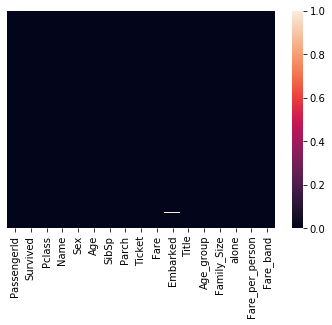

In [114]:
sns.heatmap(df.isnull(),yticklabels=False)

In [115]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [116]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_group,Family_Size,alone,Fare_per_person,Fare_band
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,1,2,1,1,80.0,4
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,3,3,1,1,80.0,4


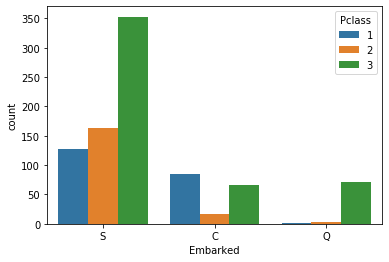

In [117]:
sns.countplot(x='Embarked',hue='Pclass',data=df)

In [118]:
df['Embarked'] = df[df['Embarked'].isnull()]='C'

In [119]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
Title              0
Age_group          0
Family_Size        0
alone              0
Fare_per_person    0
Fare_band          0
dtype: int64

In [120]:
df['Pclass'].unique()

array([3, 1, 2], dtype=object)

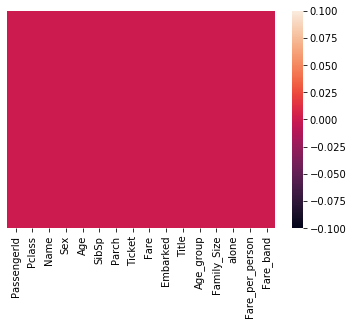

In [121]:
sns.heatmap(df2.isnull(),yticklabels=False)

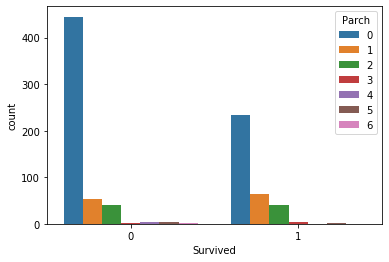

In [122]:
sns.countplot(x='Survived',hue='Parch',data=df)

In [123]:
#emd = pd.get_dummies(df["Embarked"],drop_first=True)
df['Embarked'] = pd.Categorical(df.Embarked)
df['Embarked'] = df.Embarked.cat.codes

df['Sex'] = pd.Categorical(df.Sex)
df['Sex'] = df.Sex.cat.codes

#emd2 = pd.get_dummies(df2["Embarked"],drop_first=True)
df2['Embarked'] = pd.Categorical(df2.Embarked)
df2['Embarked'] = df2.Embarked.cat.codes

df2['Sex'] = pd.Categorical(df2.Sex)
df2['Sex'] = df2.Sex.cat.codes

In [124]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_group,Family_Size,alone,Fare_per_person,Fare_band
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.25,0,2,1,2,0,3.625,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,0,3,2,2,0,35.6416,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.925,0,1,1,1,1,7.925,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1,0,3,2,2,0,26.55,3
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.05,0,2,2,1,1,8.05,2


In [125]:
df['Fare_per_person'] = df['Fare_per_person']/max(df['Fare_per_person'])
df2['Fare_per_person'] = df2['Fare_per_person']/max(df2['Fare_per_person'])


In [126]:
df.drop(['Ticket','PassengerId','Name','Age','SibSp','Parch','Fare','Family_Size','Fare_band'],inplace=True,axis=1)
df2.drop(['Ticket','PassengerId','Name','Age','SibSp','Parch','Fare','Family_Size','Fare_band'],inplace=True,axis=1)

In [127]:
df = df.astype(str).astype(float)

In [128]:
df['Pclass'].unique()

array([3., 1., 2.])

In [129]:
df2 = df2.astype(str).astype(float)
df2['Embarked'].unique()

array([1., 2., 0.])

In [130]:
df2.head()

,Pclass,Sex,Embarked,Title,Age_group,alone,Fare_per_person
0,3.0,1.0,1.0,2.0,2.0,1.0,0.029840
1,3.0,0.0,2.0,3.0,3.0,0.0,0.013340
2,2.0,1.0,1.0,2.0,4.0,1.0,0.036922
3,3.0,1.0,2.0,2.0,1.0,1.0,0.033016
4,3.0,0.0,2.0,3.0,1.0,0.0,0.015611


In [131]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [132]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Survived',axis=1).values,df['Survived'].values,test_size=0.15,random_state=42)

In [133]:
x_train[0]

array([1.       , 1.       , 0.       , 4.       , 3.       , 0.       ,
       0.0555592])

In [134]:
sf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
Dtree = DecisionTreeClassifier()
Ran_for = RandomForestClassifier()
svm = SVC()
xgb = XGBClassifier()
ada = AdaBoostClassifier()
gra = GradientBoostingClassifier()


In [135]:
clf = [('Logistic Regression',log_reg,{"penalty":['l2'],"C":[100, 10, 1.0, 0.1, 0.01]}),\
        ("Support Vector",svm,{"kernel": ["rbf"],"gamma":[0.1, 1, 10, 100],"C":[0.1, 1, 10, 100, 1000]}),\
       ("Decision Tree", Dtree, {}),\
       ("Random Forest",Ran_for,{"n_estimators":[100],"random_state":[42],"min_samples_leaf":[5,10,20,40,50],"bootstrap":[False]}),\
       ("Adapative Boost",ada,{"n_estimators":[100],"learning_rate":[.6,.8,1]}),\
       ("Gradient Boost",gra,{}),\
       ("XGBoost",xgb,{"n_estimators":[200],"max_depth":[3,4,5],"learning_rate":[.01,.1,.2],"subsample":[.8],"colsample_bytree":[1],"gamma":[0,1,5],"lambda":[.01,.1,1]}),\
      ("K Nearest",knn,{"n_neighbors":[3,5,8],"leaf_size":[25,30,35]})]
sta_list = []
train_scores = []
scores = pd.DataFrame(['Name','Training score','Testing score'])
i=0
for name,classifier,paramters in clf:
    clf = GridSearchCV(classifier,param_grid=paramters,scoring="accuracy",cv=sf,return_train_score=True)
    clf.fit(x_train,y_train.reshape(-1,1))
    y_pred = clf.best_estimator_.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    train_scores.append([name,clf.best_score_,(cm[0,0]+cm[1,1,])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])])
    sta_list.append(clf.best_estimator_)
    i=i+1

/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: Dat

/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array w

/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: 

/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: 

/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pushkara/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: 

In [136]:
train_scores

[['Logistic Regression', 0.783438596491228, 0.8208955223880597],
 ['Support Vector', 0.8150350877192982, 0.8134328358208955],
 ['Decision Tree', 0.7873859649122806, 0.8059701492537313],
 ['Random Forest', 0.8189649122807017, 0.7835820895522388],
 ['Adapative Boost', 0.8098245614035088, 0.8059701492537313],
 ['Gradient Boost', 0.8216491228070175, 0.835820895522388],
 ['XGBoost', 0.8295614035087719, 0.8507462686567164],
 ['K Nearest', 0.8110350877192982, 0.8507462686567164]]

In [137]:
sta_list

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
     probability=False, random_state=None, shrinking=True, tol=0.001,
     verbose=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, split

In [142]:
from sklearn.ensemble import StackingClassifier
est = [("D_tree",sta_list[2]),("ran_for",sta_list[3]),("ada_boost",sta_list[4]),("grad_boost",sta_list[5]),("XGB",sta_list[6]),("svc",sta_list[1]),("knn",sta_list[7])]
sc = StackingClassifier(estimators=est,final_estimator = sta_list[6],cv=sf,passthrough=False)
sc.fit(x_train,y_train)
y_pred = sc.predict(x_test)
cm1 = confusion_matrix(y_test,y_pred)
y_pred_train = sc.predict(x_train)
cm2 = confusion_matrix(y_train,y_pred_train)
train_sc = pd.DataFrame()
train_sc.append(pd.Series(["Stacking",(cm2[0,0]+cm2[1,1,])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1]),(cm1[0,0]+cm1[1,1,])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])]),ignore_index=True)

,0,1,2
0,Stacking,0.850727,0.820896


In [143]:
df3 =df2.values
pred = sc.predict(df3)
pred = [int(x) for x in pred]
submission = pd.DataFrame({"Survived": pred})
submission.index.name = 'PassengerId'
submission.index+=892
submission.to_csv("submission.csv")
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


# Logistic

In [144]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
pred = model.predict(x_test)

In [146]:
y_test

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.])

In [147]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[68, 10],
       [14, 42]])

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8208955223880597

In [55]:
y_pred = model.predict(df2)

In [98]:
y_pred.shape

(418,)

In [99]:
submission = pd.DataFrame({"Survived": y_pred}, index=df2.index)
submission.index.name = 'PassengerId'
submission.index+=892
submission.to_csv("submission.csv")

# SVM

In [71]:
from sklearn.svm import SVC
model2 = SVC(kernel='linear')
model2.fit(x_train,y_train)
pred_y2 = model2.predict(x_test)

In [72]:
accuracy_score(y_test,pred_y2)

0.7988826815642458

# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(x_train,y_train)
pred_y3 = model3.predict(x_test)

In [59]:
accuracy_score(y_test,pred_y3)

0.7653631284916201

# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(x_train,y_train)
pred_y4 = model4.predict(x_test)
accuracy_score(y_test,pred_y4)

0.8100558659217877

In [62]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
model5.fit(x_train,y_train)
pred_y5 = model5.predict(x_test)
accuracy_score(y_test,pred_y5)

0.8156424581005587

In [68]:
y_pred = model4.predict(df2)

In [70]:
submission = pd.DataFrame({"Survived": y_pred}, index=df2.index)
submission.index.name = 'PassengerId'
submission.index+=892
submission.to_csv("submission1.csv")

In [73]:
model6 = GradientBoostingClassifier()
model6.fit(x_train,y_train)
pred_y6 = model6.predict(x_test)
accuracy_score(y_test,pred_y6)

0.8100558659217877

In [74]:
y_pred = model6.predict(df2)
submission = pd.DataFrame({"Survived": y_pred}, index=df2.index)
submission.index.name = 'PassengerId'
submission.index+=892
submission.to_csv("submission1.csv")

In [152]:

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [153]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=20,validation_data=(x_test,y_test))

Epoch 1/100
38/38 [==============================] - 0s 5ms/step - loss: 0.6811 - accuracy: 0.5509 - val_loss: 0.6587 - val_accuracy: 0.5896
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 0.6297 - accuracy: 0.6354 - val_loss: 0.6333 - val_accuracy: 0.6194
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.6882 - val_loss: 0.6055 - val_accuracy: 0.6493
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 0.5588 - accuracy: 0.7107 - val_loss: 0.5725 - val_accuracy: 0.6418
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 0.5266 - accuracy: 0.7252 - val_loss: 0.5446 - val_accuracy: 0.6866
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 0.5044 - accuracy: 0.7411 - val_loss: 0.5183 - val_accuracy: 0.7313
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.7649 - val_loss: 0.4986 - val_accuracy: 0.7537
Epoch 8/100
3

Epoch 59/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8203 - val_loss: 0.4423 - val_accuracy: 0.8060
Epoch 60/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8217 - val_loss: 0.4482 - val_accuracy: 0.8060
Epoch 61/100
38/38 [==============================] - 0s 3ms/step - loss: 0.4026 - accuracy: 0.8243 - val_loss: 0.4456 - val_accuracy: 0.8060
Epoch 62/100
38/38 [==============================] - 0s 3ms/step - loss: 0.4023 - accuracy: 0.8256 - val_loss: 0.4391 - val_accuracy: 0.8060
Epoch 63/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8243 - val_loss: 0.4413 - val_accuracy: 0.8060
Epoch 64/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8164 - val_loss: 0.4373 - val_accuracy: 0.7985
Epoch 65/100
38/38 [==============================] - 0s 3ms/step - loss: 0.4027 - accuracy: 0.8177 - val_loss: 0.4387 - val_accuracy: 0.7985
Epoch 

In [154]:
pred = model.predict_classes(df2)
pred = pred.flatten()
pred = [int(x) for x in pred]
submission = pd.DataFrame({"Survived": pred})
submission.index.name = 'PassengerId'
submission.index+=892
submission.to_csv("submission3.csv")
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,1
896,1
...,...
1305,1
1306,1
1307,0


In [172]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,